In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("datasets/dataset_mood_smartphone.csv", sep=",", encoding="utf-8")

# only take columns: id, time, variable, value
df = df[['id', 'time', 'variable', 'value']]

# for grouping without aggregation


In [33]:
# drop where value is null
df = df.dropna(subset=['value'])

Spread column 'variable' into multiple columns

In [34]:
# Now pivot using the new auxiliary column as part of the index to ensure uniqueness
df['aux_index'] = df.groupby(['id', 'time', 'variable']).cumcount()
pivot_df = df.pivot(index=['id', 'time', 'aux_index'], columns='variable', values='value')
pivot_df = pivot_df.reset_index(level=['id', 'time'])
pivot_df


variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
aux_index,,,,,,,,,,,,,,,,,,,,,
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
pivot_df.to_csv('datasets/mood_preprocessed_no_aggr.csv', index=False)

In [42]:
pivot_df['time'] = pd.to_datetime(pivot_df['time'])

Group by id and day

In [35]:
sum_cols = [
    'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
    'appCat.entertainment', 'appCat.finance', 'appCat.game',
    'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
    'appCat.unknown', 'appCat.utilities', 'appCat.weather'
] 
mean_cols = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity']

/var/folders/d5/yjzfq2w12h1721vfsgkvjy2h0000gn/T/ipykernel_32891/1000044722.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20b', 27)  # 'tab20b' is a good choice for many distinct colors


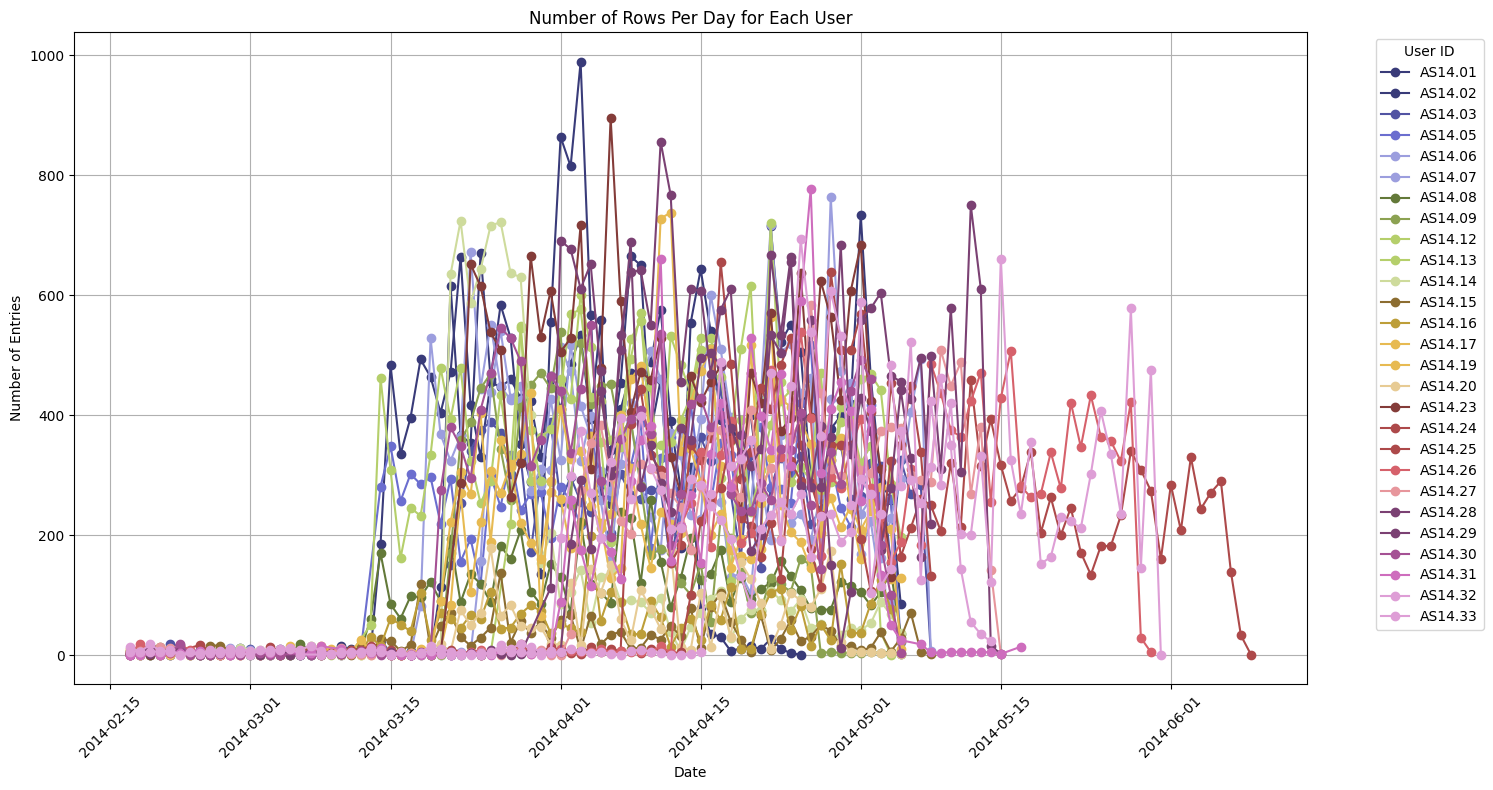

In [43]:
# Plot
cmap = plt.cm.get_cmap('tab20b', 27)  # 'tab20b' is a good choice for many distinct colors

# Plot settings
plt.figure(figsize=(15, 8))

# Loop through each unique user
for idx, user_id in enumerate(pivot_df['id'].unique()):
    # Filter for each user
    user_df = pivot_df[pivot_df['id'] == user_id]

    # Group by date and count rows
    daily_counts = user_df.groupby(user_df['time'].dt.date).size()

    # Plotting each user's data on the same plot
    daily_counts.plot(kind='line', marker='o', label=user_id, color=cmap(idx))

plt.title('Number of Rows Per Day for Each User')
plt.xlabel('Date')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
# save the plot
# plt.savefig('figs/number_of_rows_per_user_per_day.png')

In [ ]:
# save the plot
# plt.savefig('figs/number_of_rows_per_user_per_day.png')